In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gst=pd.read_csv('../../GSTN_project/Train_60/Train_60/X_Train_Data_Input.csv')
gst_tar=pd.read_csv('../../GSTN_project/Train_60/Train_60/Y_Train_Data_Target.csv')
gst=pd.concat([gst,gst_tar],axis=1)
gst=gst.drop(columns=['ID'])
from sklearn.preprocessing import StandardScaler
gst=gst.drop(columns=['Column9'])
ss=StandardScaler()
gst[['Column1','Column2','Column14','Column15']]=ss.fit_transform(gst[['Column1','Column2','Column14','Column15']])
gst_clean=gst.dropna(subset='Column6')
gst_clean['Column0'].fillna(gst_clean['Column0'].median(),inplace=True)
cols=['Column3','Column4','Column5']
gst_clean[cols]=gst_clean[cols].fillna(gst_clean[cols].mean())
gst_clean['Column15']=gst_clean['Column15'].fillna(gst_clean['Column15'].mode()[0])
gst_clean['Column14']=gst_clean['Column14'].fillna(gst_clean['Column14'].mode()[0])
X_train=gst_clean.drop(columns=['target'])
y_train=gst_clean['target']
X_test=pd.read_csv('../../GSTN_project/Test_20/Test_20/X_Test_Data_Input.csv')
y_test=pd.read_csv('../../GSTN_project/Test_20/Test_20/Y_Test_Data_Target.csv')
X_test=X_test.drop(columns=['ID','Column9'])
test_gst=pd.concat([X_test,y_test],axis=1)
test_gst=test_gst.drop(columns=['ID'])
test_gst[['Column1','Column2','Column14','Column15']]=ss.transform(test_gst[['Column1','Column2','Column14','Column15']])
test_gst_clean=test_gst.dropna(subset='Column6')
test_gst_clean['Column0'].fillna(test_gst_clean['Column0'].median(),inplace=True)
cols=['Column3','Column4','Column5']
test_gst_clean[cols]=test_gst_clean[cols].fillna(test_gst_clean[cols].mean())

test_gst_clean['Column15']=test_gst_clean['Column15'].fillna(test_gst_clean['Column15'].mode()[0])
test_gst_clean['Column14']=test_gst_clean['Column14'].fillna(test_gst_clean['Column14'].mode()[0])
test_gst_clean.info()
X_test_gst=test_gst_clean.drop(columns=['target'])
y_test_gst=test_gst_clean['target']

C:\Users\aayuk\AppData\Local\Temp\ipykernel_11484\628977601.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gst_clean['Column0'].fillna(gst_clean['Column0'].median(),inplace=True)
C:\Users\aayuk\AppData\Local\Temp\ipykernel_11484\628977601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gst_clean['Column0'].fillna(gst_clean['Column0'

<class 'pandas.core.frame.DataFrame'>
Index: 260478 entries, 0 to 261711
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   260478 non-null  float64
 1   Column1   260478 non-null  float64
 2   Column2   260478 non-null  float64
 3   Column3   260478 non-null  float64
 4   Column4   260478 non-null  float64
 5   Column5   260478 non-null  float64
 6   Column6   260478 non-null  float64
 7   Column7   260478 non-null  float64
 8   Column8   260478 non-null  float64
 9   Column10  260478 non-null  int64  
 10  Column11  260478 non-null  int64  
 11  Column12  260478 non-null  int64  
 12  Column13  260478 non-null  int64  
 13  Column14  260478 non-null  float64
 14  Column15  260478 non-null  float64
 15  Column16  260478 non-null  float64
 16  Column17  260478 non-null  int64  
 17  Column18  260478 non-null  float64
 18  Column19  260478 non-null  int64  
 19  Column20  260478 non-null  int64  
 20  Column21 

C:\Users\aayuk\AppData\Local\Temp\ipykernel_11484\628977601.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_gst_clean['Column0'].fillna(test_gst_clean['Column0'].median(),inplace=True)
C:\Users\aayuk\AppData\Local\Temp\ipykernel_11484\628977601.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_gst_clean['Column0'].fillna(test

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ada=AdaBoostClassifier(n_estimators=400,learning_rate=0.88)

In [123]:
ada.fit(X_train,y_train)

C:\Users\aayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.88, n_estimators=400)

In [124]:
y_pred_gst=ada.predict(X_test_gst)

In [125]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [126]:
accuracy_score(y_test_gst,y_pred_gst)

0.9762513532812752

In [59]:
report=classification_report(y_pred_gst,y_test_gst)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    232007
           1       0.95      0.82      0.88     28471

    accuracy                           0.98    260478
   macro avg       0.97      0.91      0.93    260478
weighted avg       0.98      0.98      0.97    260478



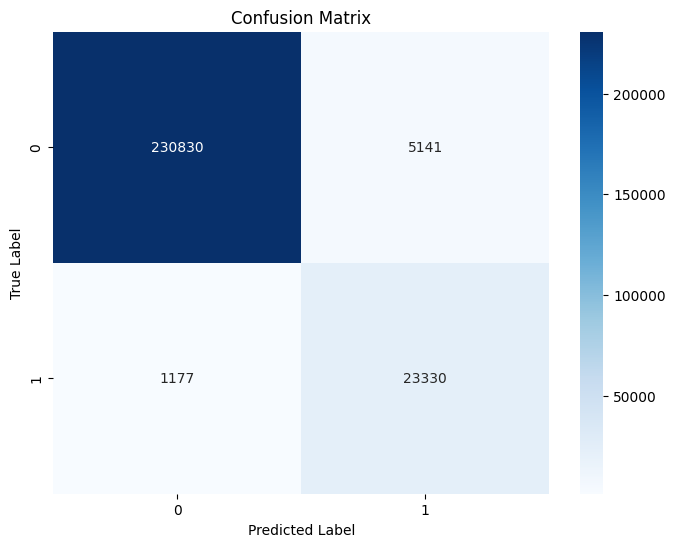

In [61]:
cm = confusion_matrix(y_test_gst, y_pred_gst)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [4]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [5]:
X_train.describe()

Column0        Column1        Column2        Column3  \
count  781283.000000  781283.000000  781283.000000  781283.000000   
mean        0.433916       0.004355       0.000512      -0.000210   
std         1.134481       0.998577       0.999723       0.918236   
min         0.000000      -1.527431      -1.399013      -2.028572   
25%         0.000000      -0.885945      -0.849352      -0.000210   
50%         0.000000      -0.159588      -0.112116       0.452580   
75%         0.000000       1.228096       0.710510       0.678139   
max        17.000000       1.293126       3.424286       0.678139   

             Column4        Column5        Column6        Column7  \
count  781283.000000  781283.000000  781283.000000  781283.000000   
mean       -0.000855      -0.000367      -0.000709      -0.002335   
std         0.917635       0.902919       0.998984       0.978298   
min        -1.855728      -0.007469      -0.407939      -0.015607   
25%        -0.321449      -0.007469      -0.407939      -0.015607   
50%         0.488309      -0.007468      -0.407939      -0.015607   
75%         0.701403      -0.007468      -0.367723      -0.015607   
max         0.701403     551.421127      14.985817     201.687947   

             Column8       Column10  ...       Column12       Column13  \
count  781283.000000  781283.000000  ...  781283.000000  781283.000000   
mean       -0.000158       0.241738  ...       0.364875       0.329874   
std         1.056769       0.428137  ...       0.481396       0.470167   
min        -0.774979       0.000000  ...       0.000000       0.000000   
25%        -0.774979       0.000000  ...       0.000000       0.000000   
50%         0.122085       0.000000  ...       0.000000       0.000000   
75%         0.625528       0.000000  ...       1.000000       1.000000   
max       323.992484       1.000000  ...       1.000000       1.000000   

            Column14       Column15       Column16       Column17  \
count  781283.000000  781283.000000  781283.000000  781283.000000   
mean        0.000794       0.000053       0.001212       0.270724   
std         0.732700       0.991900       0.034941       3.132835   
min      -644.941265    -850.515635       0.000000       0.000000   
25%         0.001714       0.003293       0.000000       0.000000   
50%         0.001714       0.003293       0.000000       0.000000   
75%         0.001714       0.003293       0.000000       0.000000   
max         6.594851       0.010575       2.000000     728.000000   

            Column18       Column19       Column20       Column21  
count  781283.000000  781283.000000  781283.000000  781283.000000  
mean        0.146459       0.018788       0.009397       0.002771  
std         0.428085       0.135777       0.096483       0.052568  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max        12.000000       1.000000       1.000000       1.000000  

[8 rows x 21 columns]

In [6]:
from sklearn.ensemble import IsolationForest

In [23]:
anomaly=IsolationForest(contamination=0.06)
col_5=np.expand_dims(X_train['Column5'].values,axis=1)
anomaly_5=anomaly.fit(col_5)

In [24]:
ano=anomaly_5.predict(col_5)

In [25]:
unique,counts=np.unique(ano,return_counts=True)

In [26]:
counts

array([ 46790, 734493], dtype=int64)

In [27]:
gst.describe()

Column0       Column1       Column2        Column3  \
count  785124.000000  7.851330e+05  7.851330e+05  658830.000000   
mean        0.440757 -8.697018e-17  4.848972e-17      -0.000210   
std         1.163275  1.000001e+00  1.000001e+00       0.999935   
min         0.000000 -2.647278e+00 -1.399013e+00      -2.028572   
25%         0.000000 -8.892512e-01 -8.502853e-01      -0.675216   
50%         0.000000 -1.639964e-01 -1.130489e-01       0.678139   
75%         0.000000  1.226994e+00  7.095763e-01       0.678139   
max        18.000000  1.297535e+00  3.424286e+00       0.678139   

             Column4        Column5        Column6        Column7  \
count  657423.000000  617953.000000  781283.000000  785133.000000   
mean       -0.000855      -0.000367      -0.000709       0.000727   
std         1.000350       1.015255       0.998984       1.045883   
min        -1.855728      -0.007469      -0.407939      -0.015607   
25%        -0.577162      -0.007469      -0.407939      -0.015607   
50%         0.701403      -0.007469      -0.407939      -0.015607   
75%         0.701403      -0.007468      -0.367723      -0.015607   
max         0.701403     551.421127      14.985817     201.687947   

             Column8       Column10  ...       Column13      Column14  \
count  781283.000000  785133.000000  ...  785133.000000  4.194300e+05   
mean       -0.000158       0.240575  ...       0.328285 -8.173876e-19   
std         1.056769       0.427433  ...       0.469589  1.000001e+00   
min        -0.774979       0.000000  ...       0.000000 -6.449413e+02   
25%        -0.774979       0.000000  ...       0.000000  1.714096e-03   
50%         0.122085       0.000000  ...       0.000000  1.714097e-03   
75%         0.625528       0.000000  ...       1.000000  1.714097e-03   
max       323.992484       1.000000  ...       1.000000  6.594851e+00   

           Column15       Column16       Column17       Column18  \
count  7.686770e+05  785133.000000  785133.000000  785133.000000   
mean  -1.287187e-18       0.001206       0.270092       0.147856   
std    1.000001e+00       0.034855       3.128214       0.430530   
min   -8.505156e+02       0.000000       0.000000       0.000000   
25%    3.293489e-03       0.000000       0.000000       0.000000   
50%    3.293489e-03       0.000000       0.000000       0.000000   
75%    3.293489e-03       0.000000       0.000000       0.000000   
max    1.057541e-02       2.000000     728.000000      12.000000   

            Column19       Column20       Column21         target  
count  785133.000000  785133.000000  785133.000000  785133.000000  
mean        0.018759       0.009351       0.002757       0.094294  
std         0.135671       0.096249       0.052439       0.292237  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 22 columns]

In [214]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [9],
    'n_estimators': [250],
    'learning_rate': [0.09],
    'gamma': [0.2],
    }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\aayuk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [01:19:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2], 'learning_rate': [0.09],
                         'max_depth': [9], 'n_estimators': [250]},
             scoring='roc_auc', verbose=1)

In [215]:
model_best=grid_search.best_estimator_

In [216]:
y_pred_gst_2=model_best.predict(X_test_gst)

In [217]:
y_pred_gst_2.shape

(260478,)

In [218]:
accuracy_score(y_test_gst,y_pred_gst_2)

0.9790231804605379

In [219]:
report=classification_report(y_pred_gst_2,y_test_gst)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    233535
           1       0.94      0.85      0.89     26943

    accuracy                           0.98    260478
   macro avg       0.96      0.92      0.94    260478
weighted avg       0.98      0.98      0.98    260478



In [220]:
import seaborn as sns

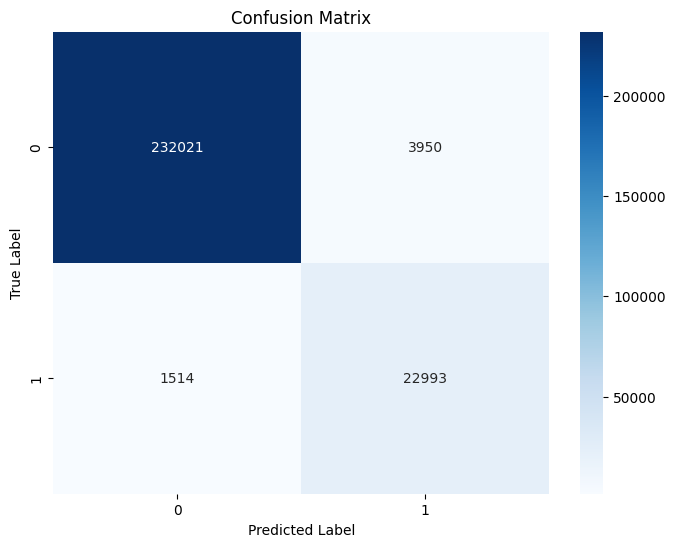

In [221]:
cm = confusion_matrix(y_test_gst, y_pred_gst_2)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [222]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 960.0 kB/s eta 0:01:46
   ---------------------------------------- 0.2/101.1 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.8/101.1 MB 6.5 MB/s eta 0:00:16
   ---------------------------------------- 1.2/101.1 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 5.0/101.1 MB 22.7 MB/s eta 0:00:05
   -- ------------------------------------- 5.3/101.1 MB 22.4 MB/s eta 0:00:05
   -- ------------------------------------- 6.2/101.1 MB 20.9 MB/s eta 0:00:05
   -- ------------------------------------- 6.9/101.1 MB 19.9 MB/s eta 0:00:05
   --- ------------------------------------ 10.0/101.1 MB 26.6 MB/s eta 0:00:04
   ---- ----------------------------------- 12.3/101.1 MB 40.9 MB/s eta 0:00:03
   ---- ----------------------------------- 12.4/101.1 MB 36.4 MB/s eta 0:00:03
   ------ --------------------------------- 15.8/101.1 MB 3

In [227]:
!pip show catboost

Name: catboost
Version: 1.2.5
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: C:\Users\aayuk\anaconda3\Lib\site-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 
